In [1]:
import pandas as pd
import polars as pl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

In [18]:
data2 = pd.read_csv("./results/2022-11-16-nasbench-evaluations.csv.gz")
data2["lim"] = data2["num_processors"] == 64
data2

,Unnamed: 0,#evaluations,simulation time (s),objectives,time_spent,genotype (categorical),problem,seed,vtr,replacement_strategy,tournament_size,algorithm_type,population_size_chosen,num_processors,population_size,lim
0,0,1,0.000000,-93.8638,4645.923107,4 2 0 3 1 5 6 1 1 9 6 3 1 5 2 3 4 5 3 5 1 1 1 ...,nasbench301,51,95.2726,5,8,sync,1984,1984,NaN,False
1,1,2,0.000000,-93.4862,4988.136382,2 1 3 5 0 2 7 1 4 0 3 0 4 1 4 0 4 4 5 4 6 3 2 ...,nasbench301,51,95.2726,5,8,sync,1984,1984,NaN,False
2,2,3,0.000000,-92.4785,3885.660152,2 4 6 5 0 5 4 2 1 9 5 0 0 6 5 0 5 6 1 0 1 1 6 ...,nasbench301,51,95.2726,5,8,sync,1984,1984,NaN,False
3,3,4,0.000000,-92.5263,3891.022711,1 2 5 5 2 5 1 2 1 6 4 0 0 2 1 1 4 2 1 3 2 6 0 ...,nasbench301,51,95.2726,5,8,sync,1984,1984,NaN,False
4,4,5,0.000000,-93.2953,4704.903596,5 4 4 4 2 0 6 2 3 2 2 0 0 0 4 0 3 0 3 2 4 5 3 ...,nasbench301,51,95.2726,5,8,sync,1984,1984,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1503423,115458,115460,157618.682463,-95.1941,6040.645920,2 2 0 3 2 1 1 0 0 0 4 3 2 6 4 3 4 3 4 4 4 3 4 ...,nasbench301,51,95.2726,6,4,async-throttled,4096,4096,4096.0,False
1503424,115459,115461,157618.850125,-95.2014,6157.628684,2 2 0 4 2 1 1 0 0 0 4 4 2 4 4 3 4 3 4 4 4 3 4 ...,nasbench301,51,95.2726,6,4,async-throttled,4096,4096,4096.0,False
1503425,115460,115462,157619.500735,-95.2163,6092.778145,2 2 0 4 2 1 1 0 4 0 4 4 2 0 4 3 4 3 4 3 4 3 4 ...,nasbench301,51,95.2726,6,4,async-throttled,4096,4096,4096.0,False
1503426,115461,115463,157620.760299,-95.1710,6133.019082,2 2 0 4 0 1 1 0 0 0 6 4 2 5 4 3 1 3 4 4 4 3 4 ...,nasbench301,51,95.2726,6,4,async-throttled,4096,4096,4096.0,False


In [33]:
data2.sort_values("#evaluations").groupby(["replacement_strategy","tournament_size","algorithm_type"]).last()

Unnamed: 0  \
replacement_strategy tournament_size algorithm_type                  
0                    4               gomea-async             22708   
                                     gomea-sync              13924   
5                    4               async-throttled         78357   
                                     ga-twopoint-async      138348   
                                     ga-twopoint-sync        26110   
                                     ga-uniform-async        91596   
                                     ga-uniform-sync        132019   
                     8               async-throttled        110916   
                                     sync                    65471   
6                    4               async-throttled        144619   
                                     ga-twopoint-async       37629   
                                     ga-twopoint-sync        15520   
                                     ga-uniform-async         8940   
                                     ga-uniform-sync          4968   
                                     sync                   112639   
                     8               async-throttled         30912   
                                     sync                   122683   

                                                        #evaluations  \
replacement_strategy tournament_size algorithm_type                    
0                    4               gomea-async               22710   
                                     gomea-sync                13926   
5                    4               async-throttled           78359   
                                     ga-twopoint-async        138349   
                                     ga-twopoint-sync          26112   
                                     ga-uniform-async          91598   
                                     ga-uniform-sync          132020   
                     8               async-throttled          110917   
                                     sync                      65472   
6                    4               async-throttled          144621   
                                     ga-twopoint-async         37631   
                                     ga-twopoint-sync          15522   
                                     ga-uniform-async           8942   
                                     ga-uniform-sync            4970   
                                     sync                     112640   
                     8               async-throttled           30914   
                                     sync                     122684   

                                                        simulation time (s)  \
replacement_strategy tournament_size algorithm_type                           
0                    4               gomea-async               2.546418e+06   
                                     gomea-sync                1.484794e+06   
5                    4               async-throttled           6.980592e+06   
                                     ga-twopoint-async         1.217809e+07   
                                     ga-twopoint-sync          3.417349e+05   
                                     ga-uniform-async          7.988742e+06   
                                     ga-uniform-sync           1.173269e+07   
                     8               async-throttled           1.013540e+07   
                                     sync                      2.108773e+05   
6                    4               async-throttled           1.282592e+07   
                                     ga-twopoint-async         2.021003e+05   
                                     ga-twopoint-sync          1.448358e+06   
                                     ga-uniform-async          1.938478e+05   
                                     ga-uniform-sync           4.625683e+05   
                                     sync                      3.494353e+05   
             

In [22]:
remapping_algorithm_type = {
    "sync": "ecga-sync",
    "async-throttled": "ecga-async-th",
}
data2["source"] = data2["algorithm_type"].replace(remapping_algorithm_type) + "_" + data2["replacement_strategy"].astype(str) + "_" + data2["tournament_size"].astype(str) + "_" + np.where(data2["lim"], "lim", "p")
data2["objective"] = -data2["objectives"]
remapping = {
    "#evaluations": "idx",
    "source": "source",
    "genotype (categorical)": "solution",
    "objective": "objective",
    "time_spent": "evaluation time",
}
data = data2.rename(columns=remapping)[remapping.values()]

In [5]:
import scipy.stats

<AxesSubplot: xlabel='objective', ylabel='evaluation time'>

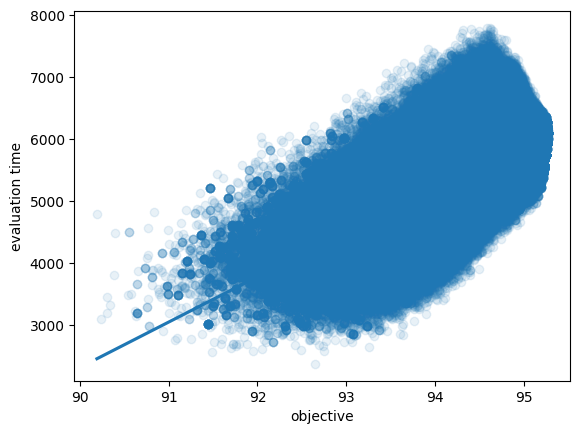

In [6]:
f = sns.regplot(data=data, x="objective", y="evaluation time", fit_reg=True, scatter_kws={'alpha':0.1})
f.get_figure().savefig("2022-11-16-scatter-all.png")
f

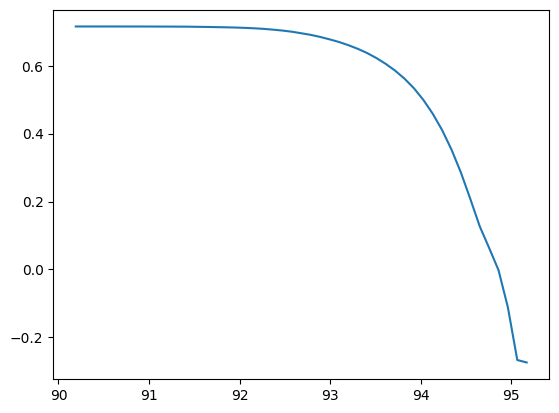

In [25]:
# def compute_rsq(c1, c2):
    # lf = np.polynomial.Polynomial.fit(c1,  c2, 1)
    # return np.sum((lf(c1) -  c2)**2) / np.sum(( c2 - np.mean( c2))**2)
def for_th(th):
    data_th = data[data["objective"] > th]
    return scipy.stats.linregress(data_th["objective"], data_th["evaluation time"])[2]
xs =  np.linspace(data["objective"].min(), data["objective"].max(), 50)[:-1]
ys = np.array([for_th(th) for th in xs])
plt.plot(xs, ys)
plt.show()

In [ ]:
sns.regplot(data=data, x="objective", y="evaluation time", fit_reg=True, scatter_kws={'alpha':0.1})
ax = sns.scatterplot(data=data, x="objective", y="evaluation time", hue="source", alpha=0.1)
sns.move_legend(ax, bbox_to_anchor=(1,1), loc="upper left")
plt.axvline(95.2727, color="purple")

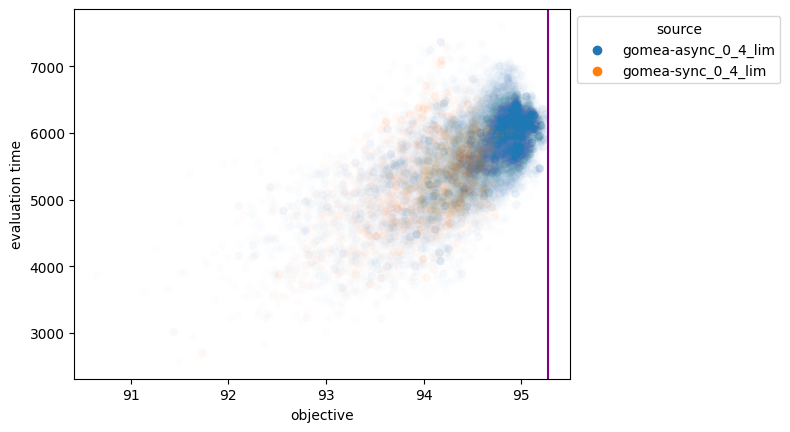

In [29]:
is_gomea = data["source"].str.contains("gomea")
is_limited = data["source"].str.endswith("_lim")
ax = sns.scatterplot(data=data[is_gomea & is_limited], x="objective", y="evaluation time", hue="source", alpha=0.01)
plt.axvline(95.2727, color="purple")
sns.move_legend(ax, bbox_to_anchor=(1,1), loc="upper left")

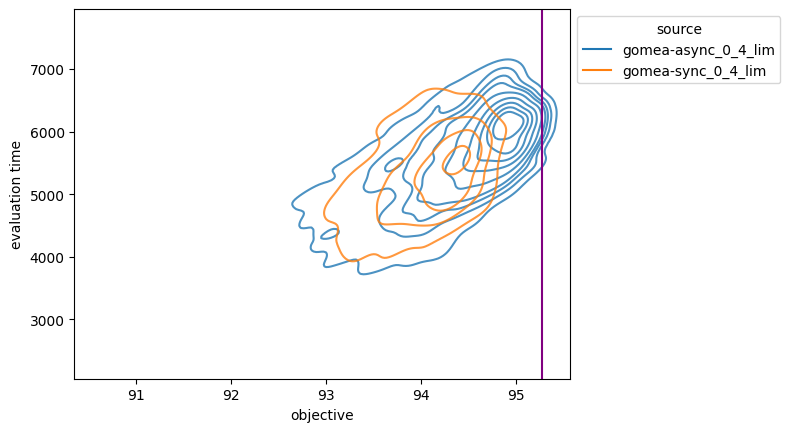

In [27]:
is_gomea = data["source"].str.contains("gomea")
is_limited = data["source"].str.endswith("_lim")
ax = sns.kdeplot(data=data[is_gomea & is_limited], x="objective", y="evaluation time", hue="source", alpha=0.8)
plt.axvline(95.2727, color="purple")
sns.move_legend(ax, bbox_to_anchor=(1,1), loc="upper left")

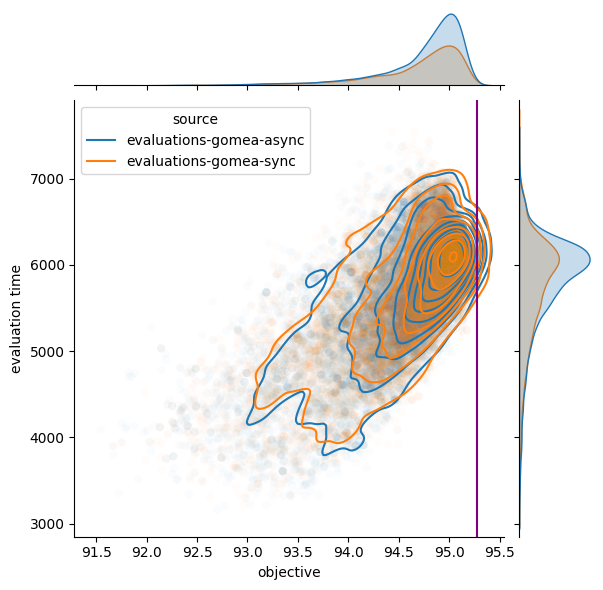

In [28]:
g = sns.jointplot(data=data, x="objective", y="evaluation time", hue="source", alpha=0.02)
g.plot_joint(sns.kdeplot)
plt.axvline(95.2727, color="purple")
# sns.move_legend(g, bbox_to_anchor=(1,1), loc="upper left")

In [ ]:
#sidenote: these points are - by how they are collected - biased towards lower evaluation times.

In [65]:
import sklearn.ensemble
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.model_selection
import sklearn.dummy

In [74]:
X = np.array([[int(n) for n in r] for r in data["solution"].str.split()])
y = data["evaluation time"]

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y.to_numpy(), train_size=0.5, test_size=0.5, random_state=42)

In [59]:
linear_model = sklearn.pipeline.Pipeline([('enc', sklearn.preprocessing.OneHotEncoder()), ('cls', sklearn.linear_model.LinearRegression())])
tree_model = sklearn.pipeline.Pipeline([('enc', sklearn.preprocessing.OneHotEncoder()), ('cls', sklearn.ensemble.RandomForestRegressor())])
dummy_model = sklearn.pipeline.Pipeline([('enc', sklearn.preprocessing.OneHotEncoder()), ('cls', sklearn.dummy.DummyRegressor())])

In [75]:
linear_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)
dummy_model.fit(X_train, y_train)

NameError: name 'dummy_model' is not defined

In [79]:
dict(zip(linear_model['enc'].get_feature_names_out(), linear_model['cls'].coef_))

{'x0_0': -357.5699099629733,
 'x0_1': -238.88309167670505,
 'x0_2': -176.8865524707454,
 'x0_3': 315.16658435858074,
 'x0_4': 414.5902641609902,
 'x0_5': -17.363997511111066,
 'x0_6': 60.94670310195706,
 'x1_0': -214.9380615838385,
 'x1_1': -239.11811461432524,
 'x1_2': -196.4290507458346,
 'x1_3': 313.59644907178694,
 'x1_4': 412.45764472793275,
 'x1_5': -97.27765909912897,
 'x1_6': 21.70879224339816,
 'x2_0': -85.33544792069125,
 'x2_1': -84.90364246457499,
 'x2_2': 62.177980405702264,
 'x2_3': 62.78972557470808,
 'x2_4': 137.01796067619892,
 'x2_5': -73.38307528440225,
 'x2_6': -18.36350098694404,
 'x3_0': -111.10584733459889,
 'x3_1': -103.92019729933335,
 'x3_2': 55.053060840088975,
 'x3_3': 114.83482746888507,
 'x3_4': 165.77070746872388,
 'x3_5': -88.98042658086374,
 'x3_6': -31.65212456290219,
 'x4_0': -43.38982928205694,
 'x4_1': 27.796136724896495,
 'x4_2': 15.59369255718286,
 'x5_0': 6.667976409956396,
 'x5_1': 2.203001050393944,
 'x5_2': -35.22403005588424,
 'x5_3': 16.4938

In [80]:
import sklearn.metrics

[
sklearn.metrics.mean_squared_error(linear_model.predict(X_test), y_test), 
sklearn.metrics.mean_squared_error(tree_model.predict(X_test), y_test),
sklearn.metrics.mean_squared_error(dummy_model.predict(X_test), y_test)
]

[145472.7172024459, 147659.24769832753, 1009211.9803689239]

<AxesSubplot: >

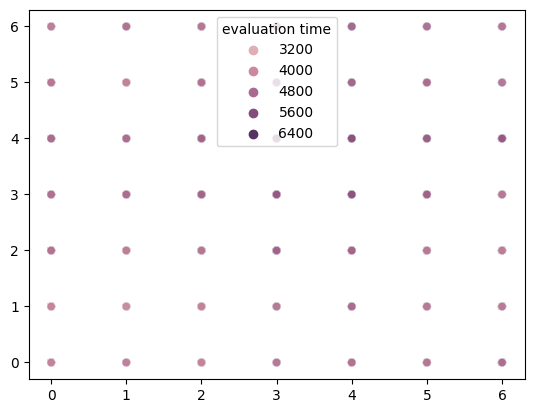

In [46]:
sns.scatterplot(data=data, x=X[:, 0], y=X[:, 1], hue="evaluation time", alpha=0.1)

<AxesSubplot: ylabel='evaluation time'>

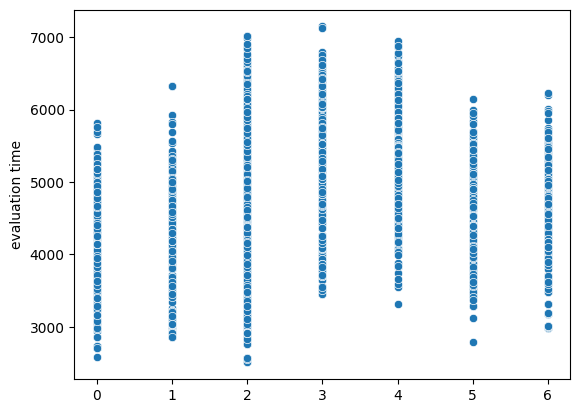

In [43]:
sns.scatterplot(data=data, x=X[:, 0], y="evaluation time")

<AxesSubplot: ylabel='evaluation time'>

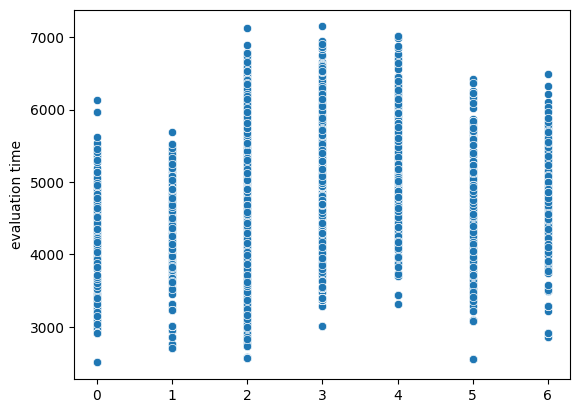

In [47]:
sns.scatterplot(data=data, x=X[:, 1], y="evaluation time")

<AxesSubplot: ylabel='evaluation time'>

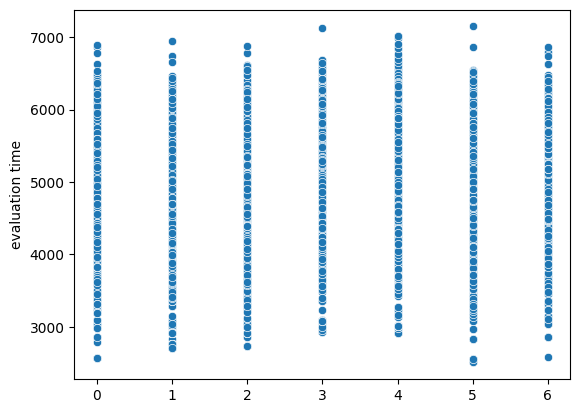

In [48]:
sns.scatterplot(data=data, x=X[:, 11], y="evaluation time")